<a href="https://www.kaggle.com/code/shivaramakrishnant/salary-prediction-of-93-accuracy?scriptVersionId=136296971" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier

In [2]:
data=pd.read_csv("/kaggle/input/salary-prediction/adult.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
data.shape

(48842, 15)

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educational-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [7]:
data.describe(include='object')

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


In [8]:
data.income.unique()

array(['<=50K', '>50K'], dtype=object)

In [9]:
data.income=data.income.replace(['<=50K', '>50K'],[0,1])

In [10]:
data.income=data.income.replace()

<Axes: xlabel='income', ylabel='count'>

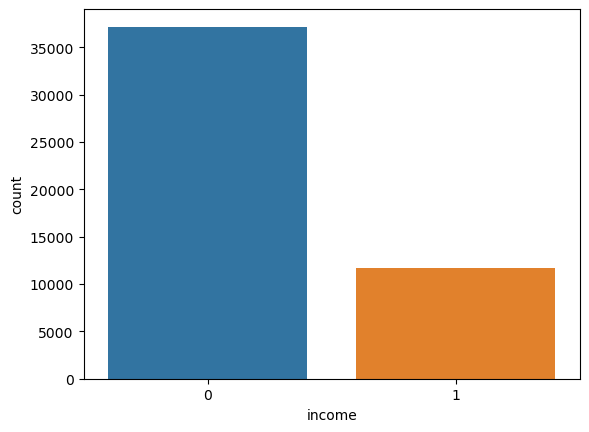

In [11]:
sns.countplot(x=data.income)

In [12]:
data.age.unique()

array([25, 38, 28, 44, 18, 34, 29, 63, 24, 55, 65, 36, 26, 58, 48, 43, 20,
       37, 40, 72, 45, 22, 23, 54, 32, 46, 56, 17, 39, 52, 21, 42, 33, 30,
       47, 41, 19, 69, 50, 31, 59, 49, 51, 27, 57, 61, 64, 79, 73, 53, 77,
       80, 62, 35, 68, 66, 75, 60, 67, 71, 70, 90, 81, 74, 78, 82, 83, 85,
       76, 84, 89, 88, 87, 86])

<Axes: xlabel='income', ylabel='age'>

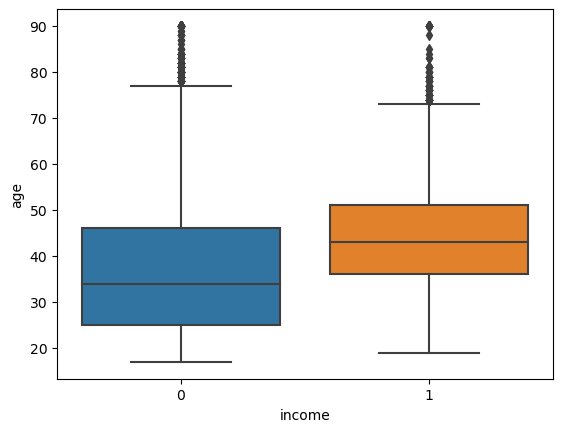

In [13]:
sns.boxplot(x=data.income, y=data.age)

<Axes: xlabel='income', ylabel='fnlwgt'>

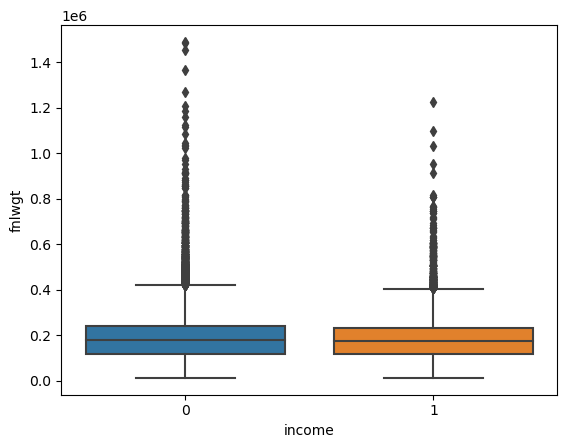

In [14]:
sns.boxplot(x=data.income,y=data['fnlwgt'])

<Axes: xlabel='income', ylabel='educational-num'>

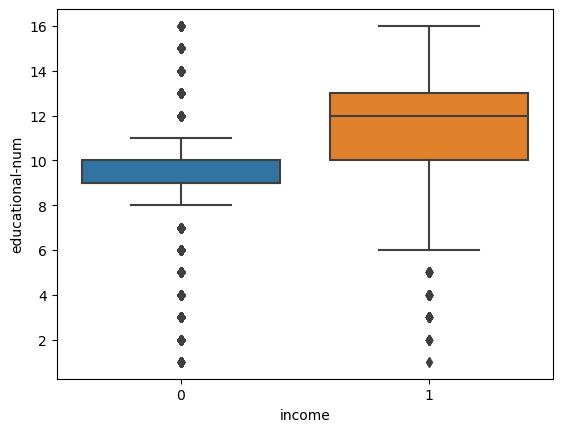

In [15]:
sns.boxplot(x=data.income,y=data['educational-num'])

<Axes: xlabel='income', ylabel='capital-gain'>

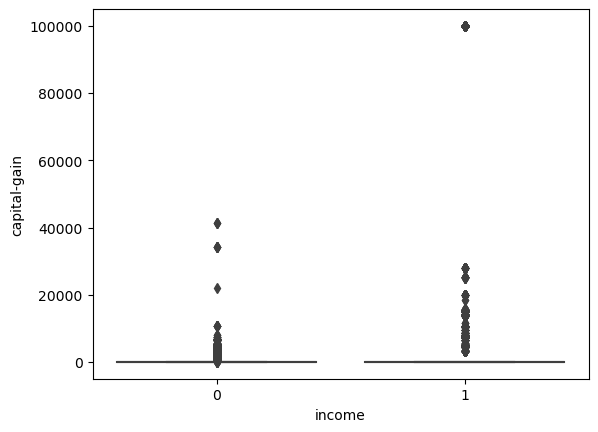

In [16]:
sns.boxplot(x=data.income,y=data['capital-gain'])

<Axes: xlabel='income', ylabel='capital-loss'>

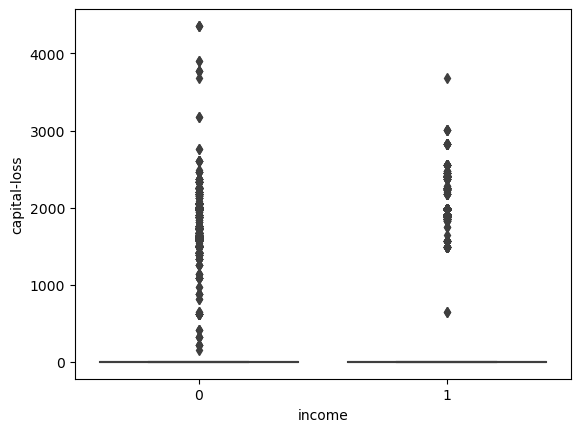

In [17]:
sns.boxplot(x=data.income,y=data['capital-loss'])

<Axes: xlabel='income', ylabel='hours-per-week'>

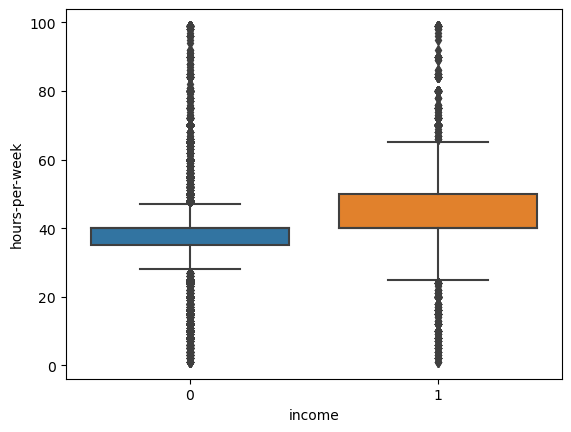

In [18]:
sns.boxplot(x=data.income,y=data['hours-per-week'])

In [19]:
data.income.unique()

array([0, 1])

In [20]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [21]:
data=data.dropna()

In [22]:
data.income=data.income.replace(['<=50K', '>50K'],[0,1])

In [23]:
data.income=data.income.replace()

/tmp/ipykernel_20/489491359.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap='Blues')


<Axes: >

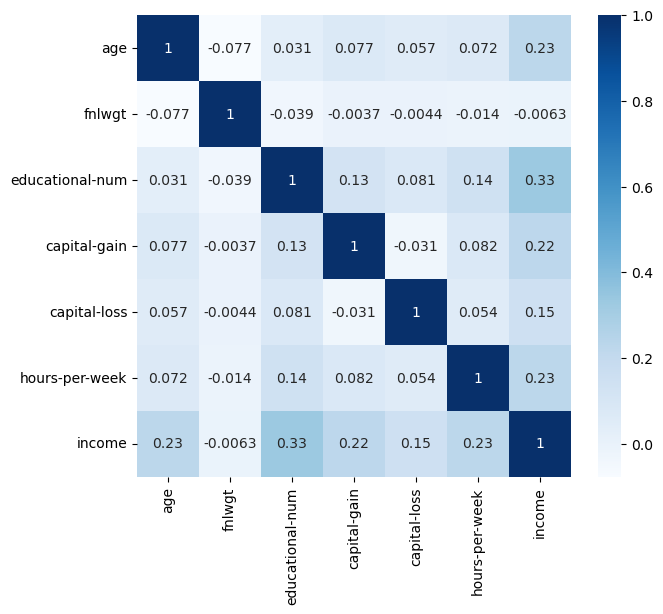

In [24]:
plt.figure(figsize=(7,6))
sns.heatmap(data.corr(),annot=True,cmap='Blues')

In [25]:
data.workclass.unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [26]:
hue=data.income

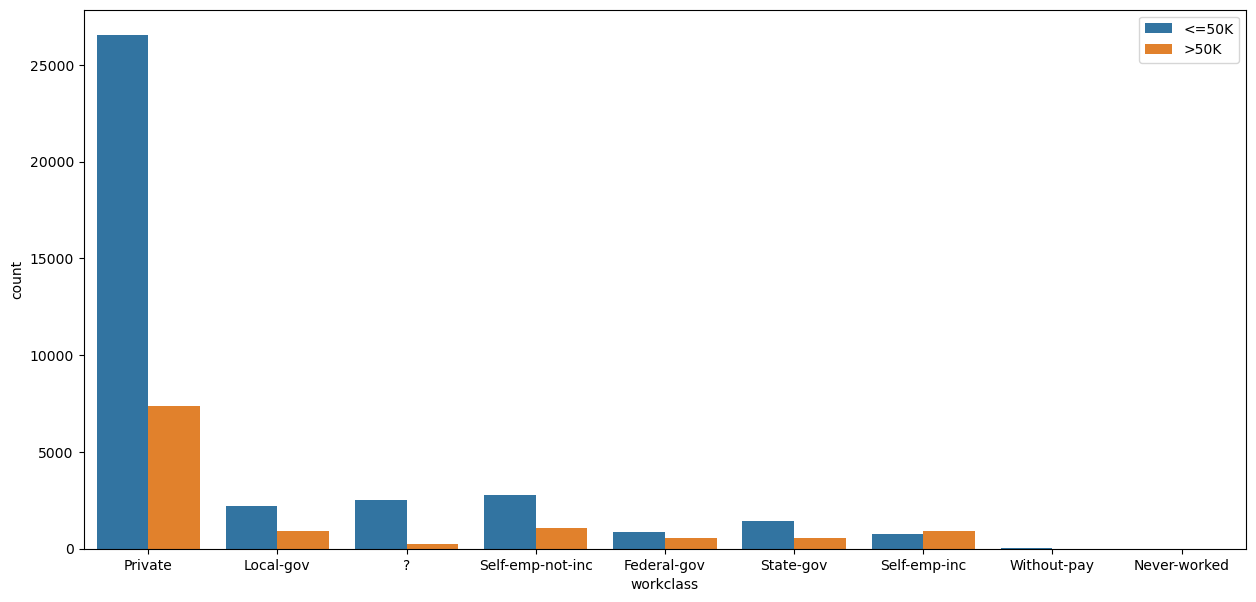

In [27]:
plt.figure(figsize=(15,7))
ax=sns.countplot(x=data.workclass, hue=data.income)
plt.legend(['<=50K', '>50K'])

In [28]:
data.education.unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

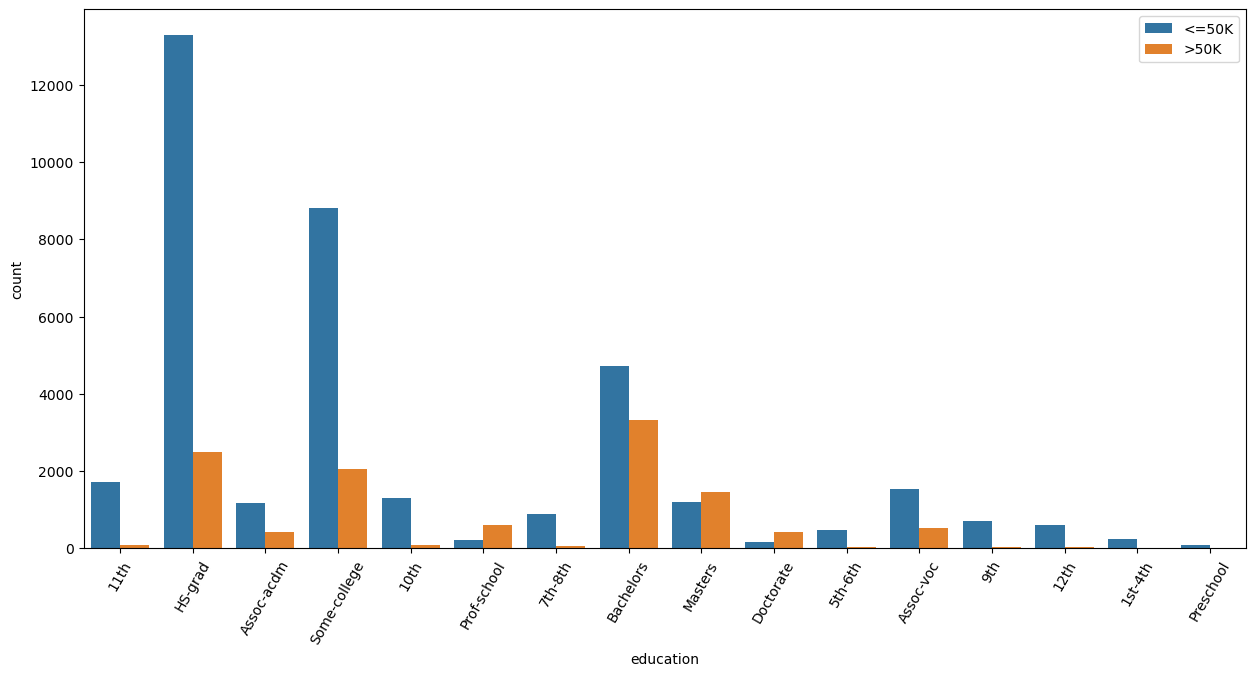

In [29]:
plt.figure(figsize=(15,7))
ax=sns.countplot(x=data.education, hue=data.income)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
plt.legend(['<=50K', '>50K'])

In [30]:
data['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

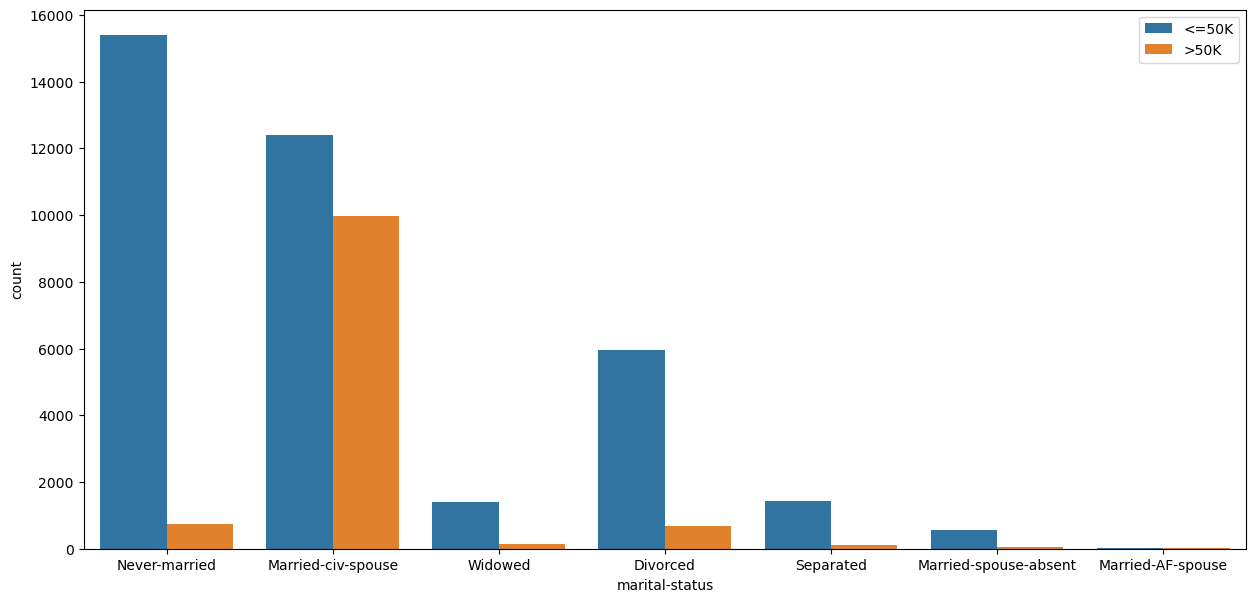

In [31]:
plt.figure(figsize=(15,7))
ax=sns.countplot(x=data['marital-status'], hue=data.income)
plt.legend(['<=50K', '>50K'])

In [32]:
data.occupation.unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

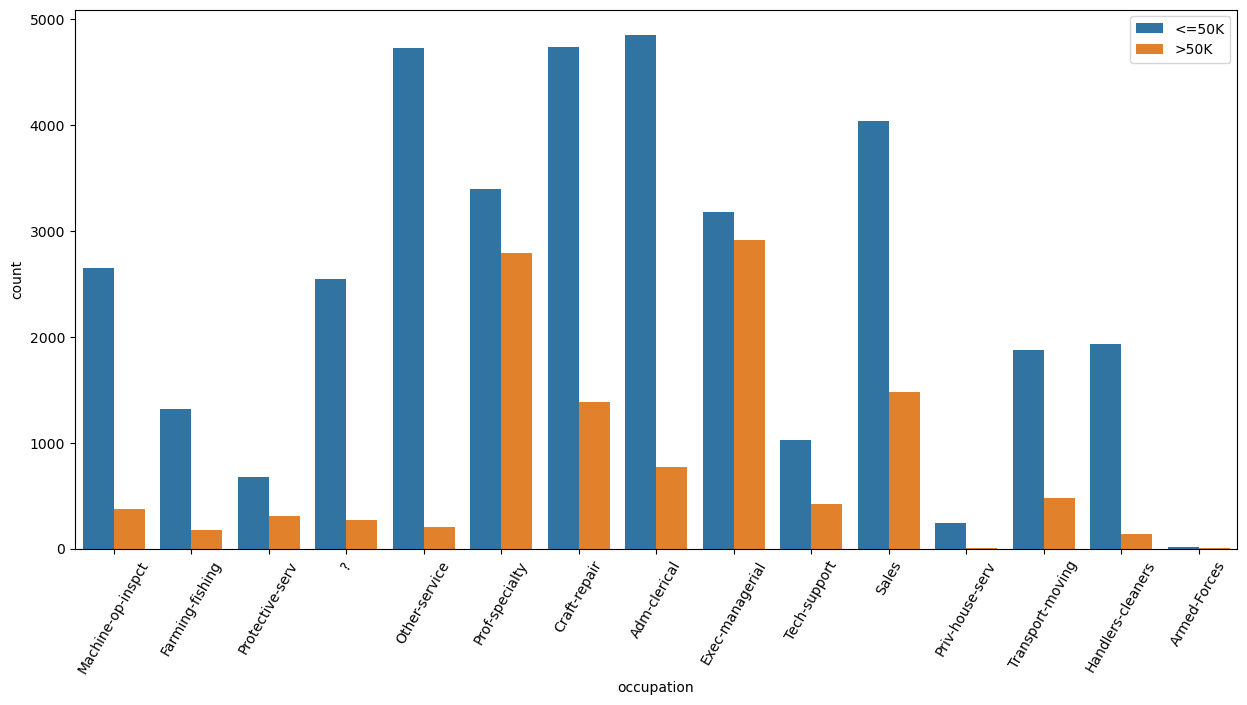

In [33]:
plt.figure(figsize=(15,7))
ax=sns.countplot(x=data.occupation,hue=data.income)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
plt.legend(['<=50K', '>50K'])

In [34]:
data.relationship.unique()

array(['Own-child', 'Husband', 'Not-in-family', 'Unmarried', 'Wife',
       'Other-relative'], dtype=object)

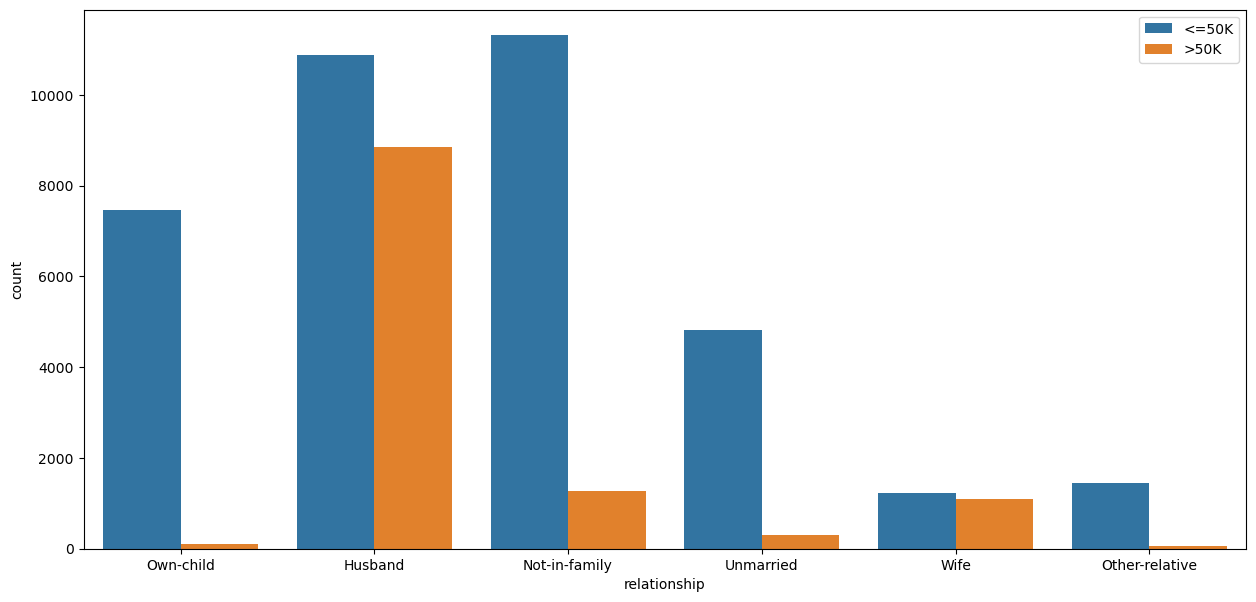

In [35]:
plt.figure(figsize=(15,7))
ax=sns.countplot(x=data.relationship, hue=data.income)
plt.legend(['<=50K', '>50K'])

In [36]:
data.gender.unique()

array(['Male', 'Female'], dtype=object)

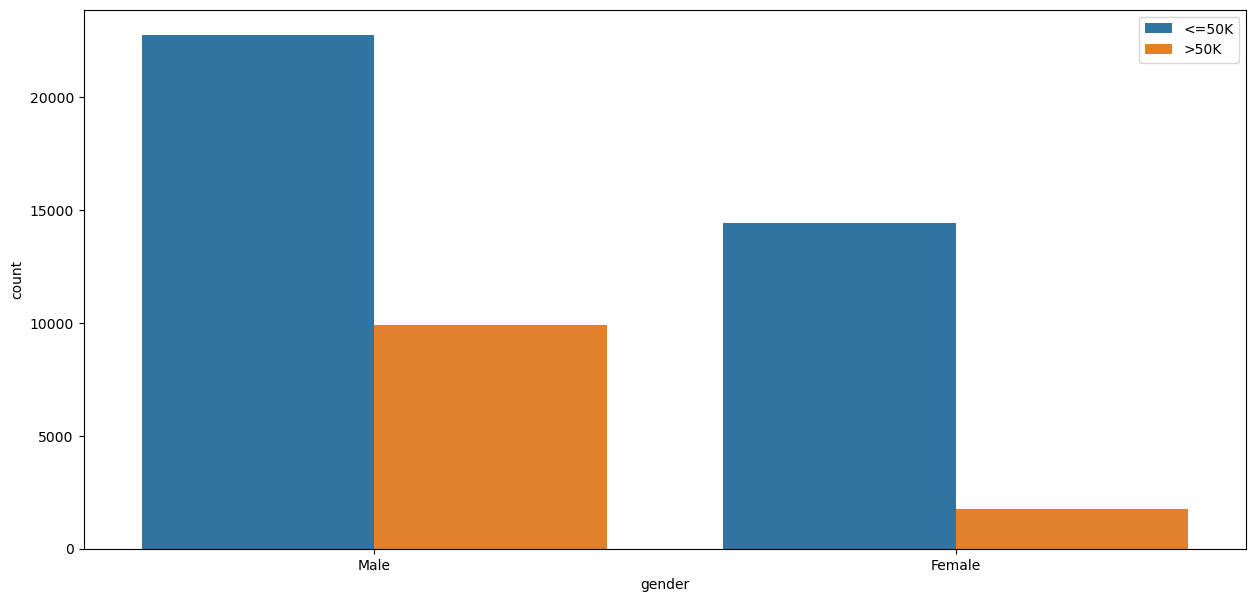

In [37]:
plt.figure(figsize=(15,7))
ax=sns.countplot(x=data.gender, hue=data.income)
plt.legend(['<=50K', '>50K'])

In [38]:
data['native-country'].unique()

array(['United-States', '?', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

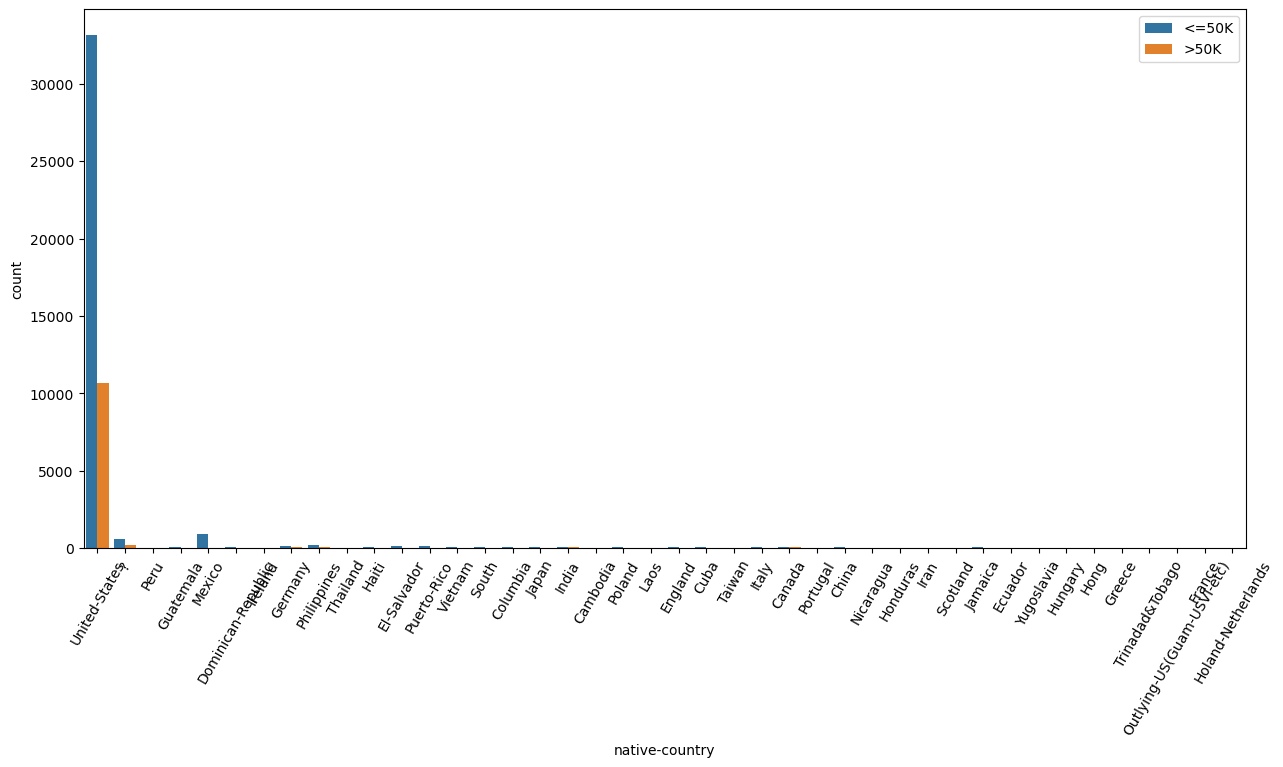

In [39]:
plt.figure(figsize=(15,7))
ax=sns.countplot(x=data['native-country'],hue=data.income)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
plt.legend(['<=50K', '>50K'])
plt.show()

In [40]:
x=data.drop(['income'],axis=1)

In [41]:
x.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States


In [42]:
numericalcols=list(data.select_dtypes(exclude='object').columns)
numericalcols.pop()
numericalcols

['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [43]:
x=pd.get_dummies(x)

In [44]:
x.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,30,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [45]:
data=data.drop(['fnlwgt'],axis=1)

In [46]:
numericalcols

['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [47]:
from sklearn.preprocessing import StandardScaler
M=StandardScaler()
x[numericalcols]=M.fit_transform(x[numericalcols])

In [48]:
x.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,-0.995129,0.351675,-1.197259,-0.144804,-0.217127,-0.034087,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,-0.046942,-0.945524,-0.419335,-0.144804,-0.217127,0.772930,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.776316,1.394723,0.747550,-0.144804,-0.217127,-0.034087,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0.390683,-0.277844,-0.030373,0.886874,-0.217127,-0.034087,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,-1.505691,-0.815954,-0.030373,-0.144804,-0.217127,-0.841104,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [49]:
y=data.income

In [50]:
x_train,x_test,y_trian,y_test=train_test_split(x,y,random_state=89,test_size=0.3)

SUPPORT VECTOR CLASSIFIER

In [51]:
ModelS=SVC()

In [52]:
ModelS.fit(x_train,y_trian)
ModelS.score(x_test,y_test)

0.858459018630997

In [53]:
y_predicS=ModelS.predict(x_test)

In [54]:
accuracy_score(y_test,y_predicS)

0.858459018630997

/tmp/ipykernel_20/3528521072.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(y_test,hist=False,label='Actual Values')
/tmp/ipykernel_20/3528521072.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(y_predicS,hist=False,label='Predicted Values')


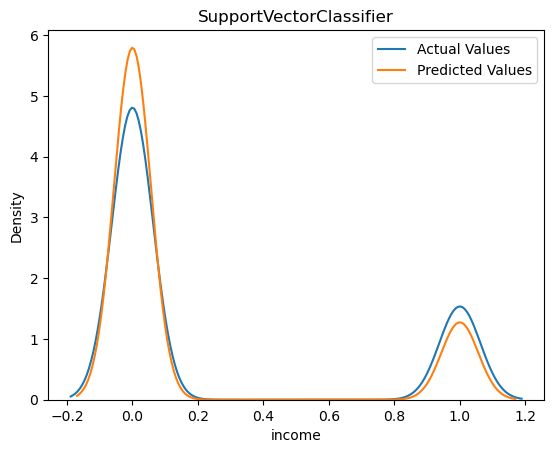

In [55]:
ax=sns.distplot(y_test,hist=False,label='Actual Values')
ax=sns.distplot(y_predicS,hist=False,label='Predicted Values')
ax.set_title('SupportVectorClassifier')
plt.legend()

In [56]:
confusion_matrix(y_test,y_predicS)

array([[10522,   584],
       [ 1490,  2057]])

<Axes: >

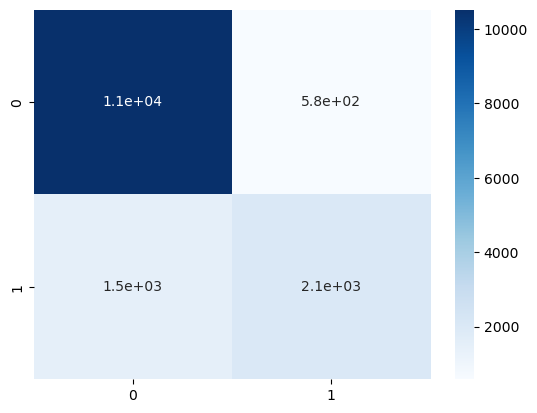

In [57]:
sns.heatmap(confusion_matrix(y_test,y_predicS),annot=True,cmap='Blues')

**RANDOM OVER SAMPLER**

In [58]:
from imblearn.over_sampling import RandomOverSampler

In [59]:
ros = RandomOverSampler(random_state = 42)
ros.fit(x, y)
x_resampled, y_resampled = ros.fit_resample(x, y)
x_train, x_test, y_trian, y_test = train_test_split(x_resampled,
y_resampled, test_size = 0.2, random_state = 42)

**RANDOM FOREST CLASSIFIER**

In [60]:
ModelR=RandomForestClassifier(max_depth = 102,n_estimators = 40, random_state = 42, criterion= 'entropy')

In [61]:
ModelR.fit(x_train,y_trian)
y_predicR=ModelR.predict(x_test)
ModelR.score(x_train,y_trian)

0.9995290001345714

In [62]:
accuracy_score(y_test,y_predicR)

0.9345310187054232

/tmp/ipykernel_20/3297229221.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(y_test,hist=False,label='Actual Values')
/tmp/ipykernel_20/3297229221.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(ModelR.predict(x_test),hist=False,label='Predicted Values')


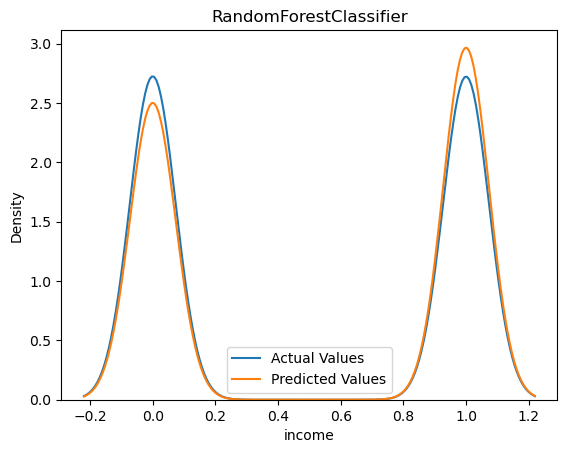

In [63]:
ax=sns.distplot(y_test,hist=False,label='Actual Values')
ax=sns.distplot(ModelR.predict(x_test),hist=False,label='Predicted Values')
ax.set_title('RandomForestClassifier')
plt.legend()

In [64]:
confusion_matrix(y_test,ModelR.predict(x_test))

array([[6630,  804],
       [ 169, 7259]])

<Axes: >

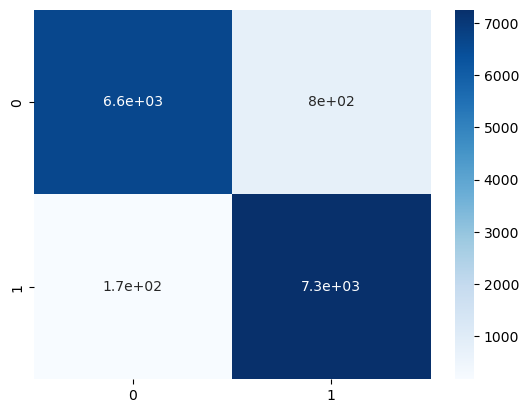

In [65]:
sns.heatmap(confusion_matrix(y_test,ModelR.predict(x_test)),annot=True,cmap='Blues')